In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
# Load the Diabetes dataset (you can replace it with any other dataset)
diabetes = datasets.load_diabetes()
data = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']], columns= np.append(diabetes['feature_names'], 'target'))

In [4]:
# For simplicity, we will use only two features (you can change this as needed)
X = data[['bmi', 'bp']]
y = data['target']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Preprocessing: Standardize the data (important for Lasso Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Create and train the Lasso Regression model
model = Lasso(alpha=1.0)  # You can adjust the alpha parameter based on your requirement
model.fit(X_train_scaled, y_train)


Lasso()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3722.6211703406907


In [10]:
# Cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation Scores: {cross_val_scores}')
print(f'Mean Cross-validation Score: {np.mean(cross_val_scores)}')


Cross-validation Scores: [0.38237796 0.26030231 0.42142333 0.52005707 0.29554443]
Mean Cross-validation Score: 0.375941020150933


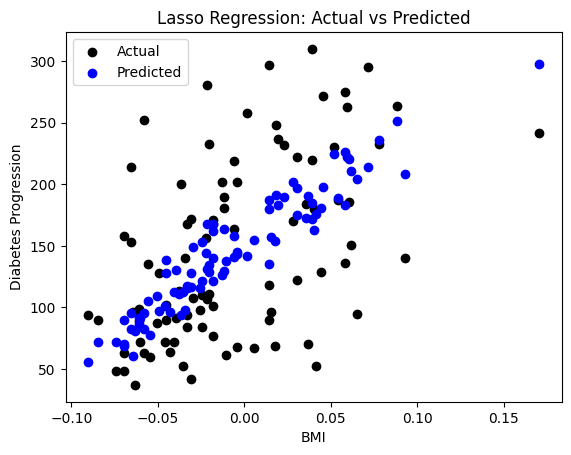

In [11]:
# Visualization
plt.scatter(X_test['bmi'], y_test, color='black', label='Actual')
plt.scatter(X_test['bmi'], y_pred, color='blue', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.title('Lasso Regression: Actual vs Predicted')
plt.show()